In [119]:
import pandas as pd
from pycaret.classification import *

estacion = '5530E'
df = pd.read_csv(r'./data/'+estacion+'_clean.csv', sep=',')

In [120]:
estacion_unsee = '3129'
df_unsee = pd.read_csv(r'./data/'+estacion+'_clean.csv', sep=',')

In [121]:
df_unsee.describe().T

,count,mean,std,min,25%,50%,75%,max
tmed,3287.0,16.580529,7.472085,-0.2,10.1,16.2,22.80,33.3
prec,3287.0,0.962838,3.476148,0.0,0.0,0.0,0.00,52.1
tmin,3287.0,8.245756,6.724084,-7.5,2.7,8.4,13.75,25.3
tmax,3287.0,24.916611,8.888129,5.5,17.2,24.3,32.40,46.0
dir,3287.0,45.273350,35.637903,1.0,20.0,27.0,99.00,99.0
velmedia,3287.0,2.402921,1.290806,0.0,1.4,2.2,3.10,10.6
racha,3287.0,9.563432,3.129678,2.2,7.8,9.7,11.40,30.0
sol,3287.0,8.788956,3.956713,0.0,6.3,9.5,12.00,14.3
presmax,3287.0,954.356404,5.028175,928.1,951.4,953.8,957.10,975.0
presmin,3287.0,949.954487,5.464782,918.5,947.1,949.7,952.85,971.7


In [122]:
df.columns

Index(['tmed', 'prec', 'tmin', 'tmax', 'dir', 'velmedia', 'racha', 'sol',
       'presmax', 'presmin', 'year', 'month', 'day', 'rain_today',
       'rain_tomorrow', 'horatmin_', 'horatmax_', 'horaracha_',
       'horapresmin_'],
      dtype='object')

In [123]:
X = df[['tmed', 'prec', 'tmin', 'tmax', 'dir', 'velmedia', 'racha', 'sol',
       'presmax', 'presmin', 'year', 'month', 'day', 'rain_today',
        'horatmin_', 'horatmax_', 'horaracha_',
       'horapresmin_']]
y = df['rain_tomorrow']

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [125]:
list_of_features = ['tmed', 'prec', 'tmin', 'tmax', 'dir', 'velmedia', 'racha', 'sol',
       'presmax', 'presmin', 'year', 'month', 'day', 'rain_today', 
        'horatmin_', 'horatmax_', 'horaracha_',
       'horapresmin_']
exp_clf101 = setup(data = df,  target = 'rain_tomorrow', fold_shuffle = True, numeric_features = list_of_features)

,Description,Value
0,session_id,7737
1,Target,rain_tomorrow
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3287, 19)"
5,Missing Values,False
6,Numeric Features,18
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [126]:
best_model = compare_models(include=['lr','knn','dt','svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8404,0.8516,0.4131,0.6377,0.4987,0.4094,0.4244,0.7810
knn,K Neighbors Classifier,0.8187,0.7741,0.3033,0.5593,0.3887,0.2945,0.3153,0.0580
dt,Decision Tree Classifier,0.7904,0.6608,0.4493,0.4598,0.4521,0.3233,0.3246,0.0130
svm,SVM - Linear Kernel,0.7478,0.0000,0.3129,0.2813,0.2648,0.1770,0.1796,0.0150


### Linear Regresion

In [127]:
lr = create_model('lr')



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8348,0.8494,0.3556,0.6400,0.4571,0.3690,0.3912
1,0.8565,0.8614,0.4000,0.7500,0.5217,0.4464,0.4770
2,0.8609,0.8478,0.5333,0.6857,0.6000,0.5174,0.5234
3,0.8522,0.8565,0.5333,0.6486,0.5854,0.4965,0.5000
4,0.8435,0.8652,0.4000,0.6667,0.5000,0.4140,0.4330
5,0.8261,0.8844,0.4091,0.5625,0.4737,0.3726,0.3794
6,0.8609,0.9019,0.4318,0.7308,0.5429,0.4671,0.4896
7,0.8304,0.8047,0.3636,0.5926,0.4507,0.3572,0.3721
8,0.8087,0.8484,0.3636,0.5000,0.4211,0.3099,0.3155
9,0.8304,0.7959,0.3409,0.6000,0.4348,0.3438,0.3629


In [128]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7737, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


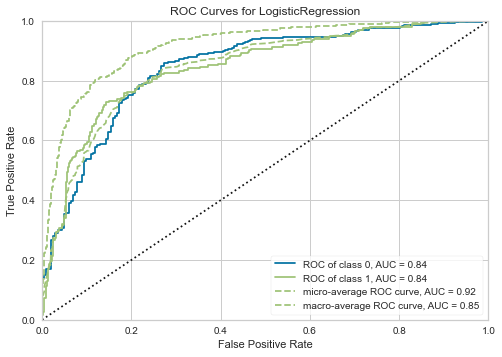

In [129]:
plot_model(lr, plot = 'auc')

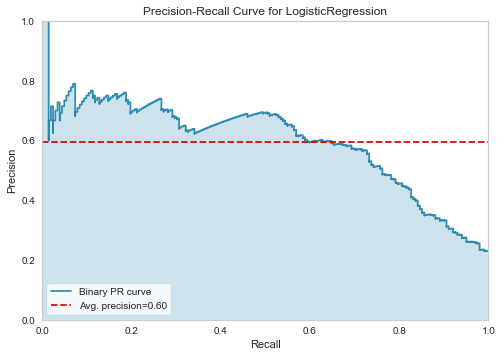

In [130]:
plot_model(lr, plot = 'pr')

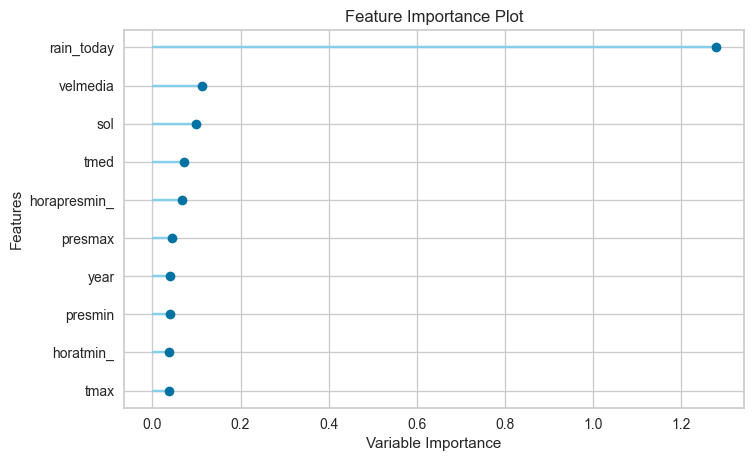

In [131]:
plot_model(lr, plot='feature')

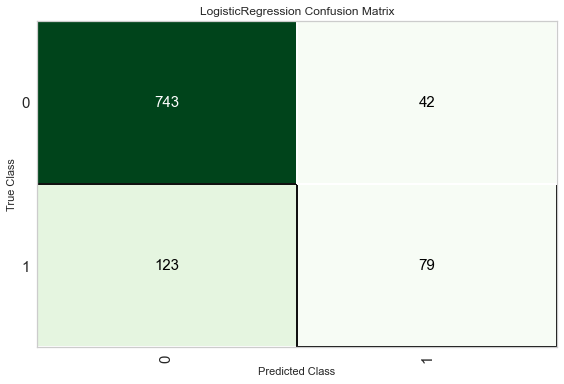

In [132]:
plot_model(lr, plot = 'confusion_matrix')

### KNN

In [133]:
knn = create_model('knn')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7870,0.7432,0.2444,0.4231,0.3099,0.1944,0.2047
1,0.8130,0.7465,0.2000,0.5625,0.2951,0.2145,0.2529
2,0.8391,0.7668,0.4667,0.6176,0.5316,0.4368,0.4431
3,0.8174,0.7823,0.3111,0.5600,0.4000,0.3025,0.3207
4,0.8391,0.8029,0.3333,0.6818,0.4478,0.3663,0.3986
5,0.8174,0.7903,0.3864,0.5312,0.4474,0.3412,0.3475
6,0.8174,0.8094,0.2273,0.5556,0.3226,0.2379,0.2698
7,0.8478,0.7596,0.3409,0.7143,0.4615,0.3856,0.4215
8,0.8130,0.7824,0.3182,0.5185,0.3944,0.2912,0.3034
9,0.7957,0.7571,0.2045,0.4286,0.2769,0.1749,0.1912


In [134]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7913,0.6937,0.5333,0.4706,0.5000,0.3688,0.3699
1,0.7870,0.6405,0.4000,0.4500,0.4235,0.2934,0.2942
2,0.8000,0.6655,0.4444,0.4878,0.4651,0.3424,0.3430
3,0.7913,0.6601,0.4444,0.4651,0.4545,0.3256,0.3257
4,0.8174,0.6847,0.4667,0.5385,0.5000,0.3890,0.3905
5,0.7609,0.6700,0.5227,0.4035,0.4554,0.3055,0.3097
6,0.8304,0.7217,0.5455,0.5581,0.5517,0.4472,0.4472
7,0.7783,0.5940,0.2955,0.3939,0.3377,0.2078,0.2109
8,0.7565,0.6326,0.4318,0.3800,0.4043,0.2520,0.2528
9,0.7913,0.6454,0.4091,0.4500,0.4286,0.3013,0.3018


In [135]:

svm = create_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8217,0.0000,0.4222,0.5588,0.4810,0.3759,0.3813
1,0.8043,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8174,0.0000,0.5111,0.5349,0.5227,0.4099,0.4101
3,0.8043,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8217,0.0000,0.4000,0.5625,0.4675,0.3641,0.3718
5,0.1913,0.0000,1.0000,0.1913,0.3212,0.0000,0.0000
6,0.8087,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8130,0.0000,0.3182,0.5185,0.3944,0.2912,0.3034
8,0.7870,0.0000,0.4773,0.4468,0.4615,0.3289,0.3292
9,0.8087,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


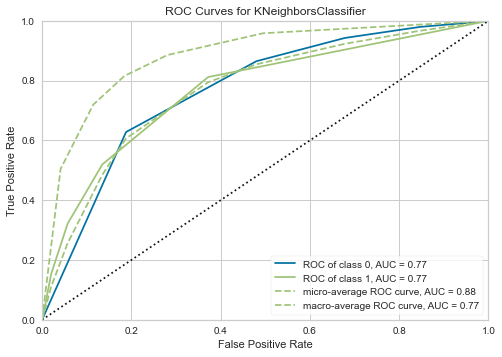

In [136]:
plot_model(knn, plot = 'auc')

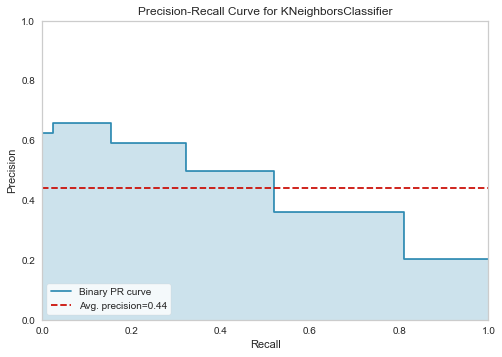

In [140]:

plot_model(knn, plot = 'pr')

In [42]:
#Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.
#plot_model(knn, plot='feature')

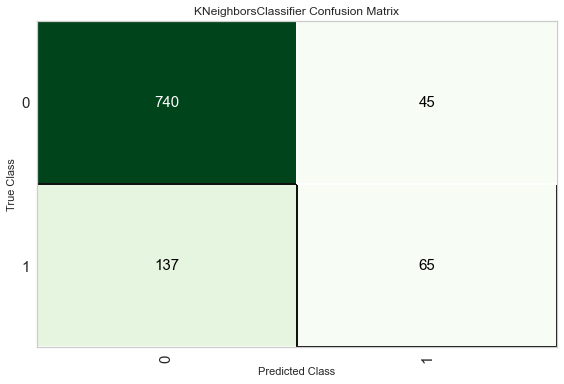

In [141]:

plot_model(knn, plot = 'confusion_matrix')

### Decision Tree

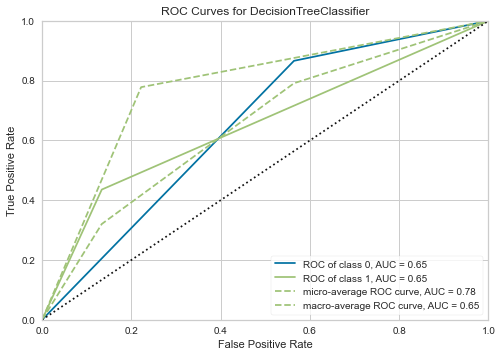

In [142]:
plot_model(dt, plot = 'auc')


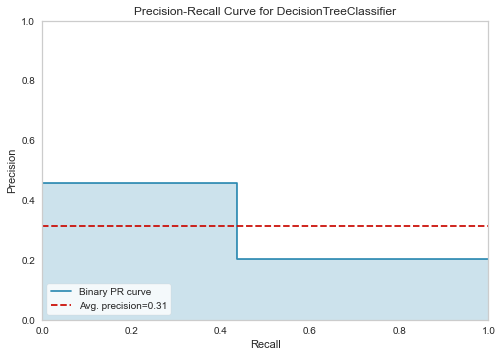

In [143]:
plot_model(dt, plot = 'pr')


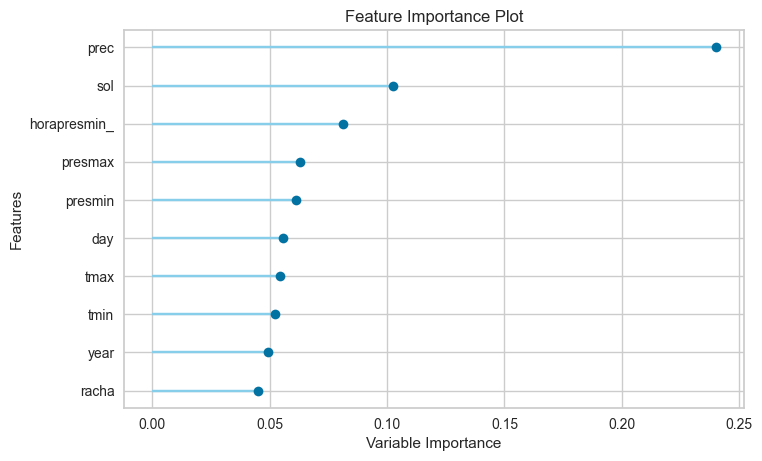

In [144]:
plot_model(dt, plot='feature')


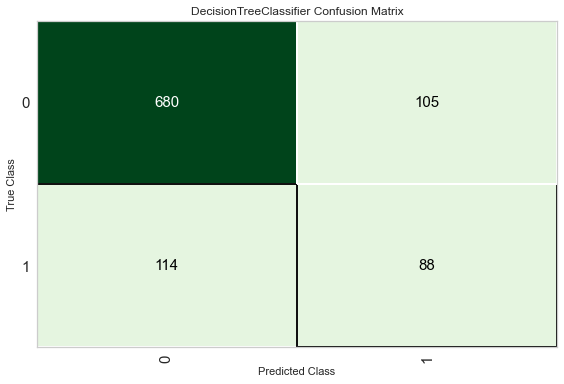

In [145]:
plot_model(dt, plot = 'confusion_matrix')

### SVM

In [146]:
# AUC plot not available for estimators with no predict_proba attribute.
# plot_model(svm, plot = 'auc')

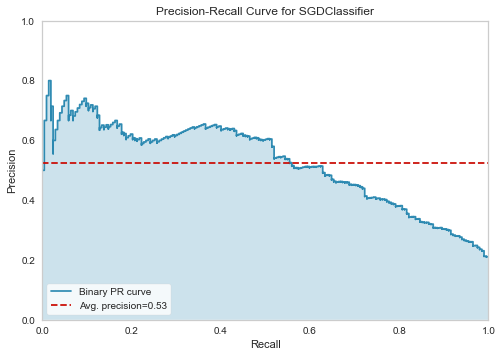

In [147]:
plot_model(svm, plot = 'pr')

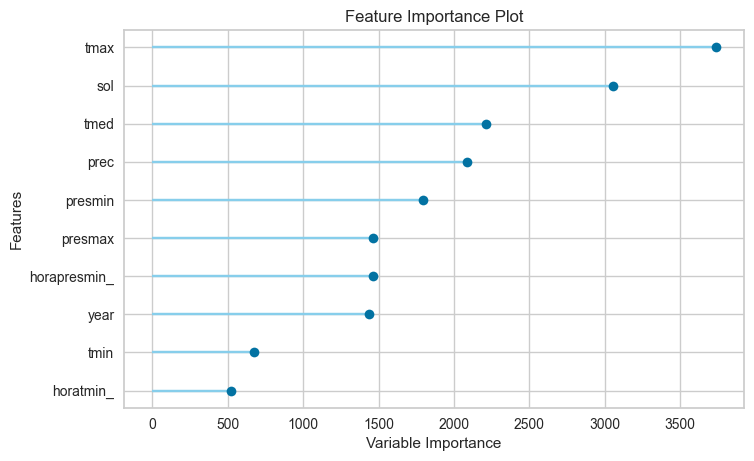

In [148]:
plot_model(svm, plot='feature')

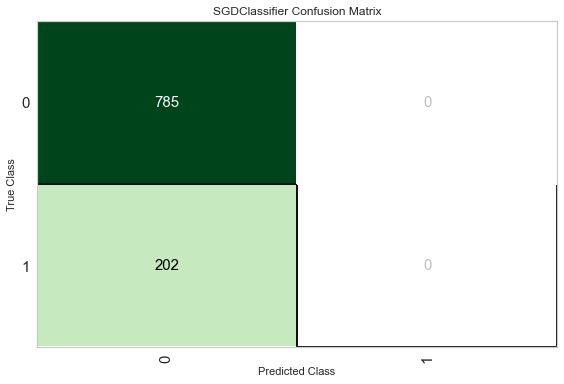

In [149]:
plot_model(svm, plot = 'confusion_matrix')

### Finalize models to check unsee data

In [150]:
final_lr = finalize_model(lr)


In [151]:
final_knn = finalize_model(knn)


In [152]:
final_dt = finalize_model(dt)

In [153]:
final_svm = finalize_model(svm)

In [154]:
unseen_lr_predictions = predict_model(final_lr, data=df_unsee)

In [155]:
predict_model(final_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8389,0.8482,0.4208,0.6693,0.5167,0.4260,0.4426


In [156]:
from pycaret.utils import check_metric
check_metric(unseen_lr_predictions['rain_tomorrow'], unseen_lr_predictions['Label'], metric = 'Accuracy')

0.8439